In [392]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [393]:
import random
import cv2

"""이미지 증강 함수"""

def image_augmentation(files, index, limit, image_width, image_height):
    random_num = []
    X_array =[]
    y_array = []
    images = []
    data = []
    
    
    
    while len(X_array) <= limit:
        try:
            #random_files.append(random.choice(files))
            #file = random_files[-1]
            #print('선택된 파일')
            #print(file)
            while True:
                i = random.randrange(len(files))
                if i not in random_num:
                    break
            random_num.append(i)

            file = files[i]
            
            
            img = data_generator(file, image_width, image_height)

            images.append(img)
            images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
            
            for image in images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(index)
                if len(X_array) >= limit:
                    break
        
        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
            #             remove(f)
        pass 
    

    
    return X_array, y_array

In [394]:
import random

"""이미지 뽑기 함수"""

def image_selector(files, index, limit, image_width, image_height):
    random_files = []
    X_array = []
    y_array = []
    data = []
    
    for i in range(limit):
        random_files.append(random.choice(files))
#     print(random_files)
    
    for i, f in enumerate(random_files):
        try:
#             img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
#             image_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#             img = cv2.resize(image_rgb, (image_width, image_height))
            
            img = data_generator(f, image_width, image_height)

            data = np.asarray(img)
            #Y는 0 아니면 1이니까 index값으로 넣는다.

            X_array.append(data)
            y_array.append(index)

        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
    #             remove(f)
            pass 
            
    return X_array, y_array

In [395]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))   
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
            print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [396]:
#본 코드 시작

import cv2
import os, glob
from os import remove
import numpy as np

img_dir = './binary_cnn/train'
# categories = ['ad', 'non_ad']
categories = os.listdir(img_dir)

sum = 0
ad_index = 0
non_ad_index = 1
image_width, image_height = 300, 300

# file_directory = []
file_list_index = []
img_limit_list = []
X = []
y = []


np_classes = len(categories)    
print(categories)

for i, category in enumerate(categories):
    file_directory = []
    img_dir_detail = os.path.join(img_dir, category)
    
    if i == ad_index:
        img_limit = 1600
    elif i == non_ad_index:
        img_limit = 1600
        
    is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)
    
    for directory in file_directory:
        file_list_index.append([i, directory])
#     file_list_index.append([i, file_directory])
    
# print(file_directory)
print(file_list_index)

for lst in file_list_index:
#     print(lst)
    print(lst[0])

count = 0

for index, directory in file_list_index:
    print(directory)
    files = glob.glob(directory + "/*.jpg")
    len_file = len(files)

    img_limit = img_limit_list[count]

    if len_file <img_limit:
        X_temp, y_temp = image_augmentation(files, index, img_limit, image_width, image_height)
    else:
        X_temp, y_temp = image_selector(files, index, img_limit, image_width, image_height)

    X = X + X_temp
    y = y + y_temp

    len_file = len(X_temp)
    print(directory + '파일 길이 : ' + str(len_file))
    sum += len_file
    count += 1
        
    
print('총 파일 길이 : ' + str(sum))

X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

"""이미지 크기 인자를 조절하면서 적용"""

['ad', 'non_ad']
./binary_cnn/train\ad\bill img limit : 145
./binary_cnn/train\ad\coin img limit : 145
./binary_cnn/train\ad\general_product img limit : 145
./binary_cnn/train\ad\graph img limit : 145
./binary_cnn/train\ad\human img limit : 145
./binary_cnn/train\ad\lotto_N img limit : 145
./binary_cnn/train\ad\lotto_P img limit : 145
./binary_cnn/train\ad\microbe img limit : 145
./binary_cnn/train\ad\part_of_human img limit : 145
./binary_cnn/train\ad\photoshop img limit : 145
./binary_cnn/train\ad\picture img limit : 145
./binary_cnn/train\non_ad img limit : 1600
[[0, './binary_cnn/train\\ad\\bill'], [0, './binary_cnn/train\\ad\\coin'], [0, './binary_cnn/train\\ad\\general_product'], [0, './binary_cnn/train\\ad\\graph'], [0, './binary_cnn/train\\ad\\human'], [0, './binary_cnn/train\\ad\\lotto_N'], [0, './binary_cnn/train\\ad\\lotto_P'], [0, './binary_cnn/train\\ad\\microbe'], [0, './binary_cnn/train\\ad\\part_of_human'], [0, './binary_cnn/train\\ad\\photoshop'], [0, './binary_cnn/tra

'이미지 크기 인자를 조절하면서 적용'

In [397]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
print(X_train.shape[0])
print(y_train.shape)
print(y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))

(2399, 300, 300, 3)
2399
(2399,)
(800,)
[1212 1187]
[386 414]


In [398]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [399]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [400]:
# import os
import keras.backend.tensorflow_backend as K

with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.15))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    #model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    #model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    #model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    # model.add(Dropout(0.15))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.25))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [401]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_v1_115 ( (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 150, 150, 32)      9248      
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_v1_116 ( (None, 75, 75, 32)        128       
__________

In [402]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.15, verbose=1)

Train on 2039 samples, validate on 360 samples
Epoch 1/20
2039/2039 [==============================] - 19s 9ms/sample - loss: 1.0443 - acc: 0.8342 - val_loss: 2.1002 - val_acc: 0.4861
Epoch 2/20
2039/2039 [==============================] - 10s 5ms/sample - loss: 0.1384 - acc: 0.9730 - val_loss: 5.4942 - val_acc: 0.4861
Epoch 3/20
2039/2039 [==============================] - 10s 5ms/sample - loss: 0.0597 - acc: 0.9902 - val_loss: 5.2304 - val_acc: 0.4861
Epoch 4/20
2039/2039 [==============================] - 10s 5ms/sample - loss: 0.0442 - acc: 0.9931 - val_loss: 7.4706 - val_acc: 0.4861
Epoch 5/20
2039/2039 [==============================] - 10s 5ms/sample - loss: 0.0738 - acc: 0.9828 - val_loss: 7.5628 - val_acc: 0.4861
Epoch 6/20
2039/2039 [==============================] - 10s 5ms/sample - loss: 0.0785 - acc: 0.9848 - val_loss: 8.2779 - val_acc: 0.4861
Epoch 7/20
2039/2039 [==============================] - 10s 5ms/sample - loss: 0.0186 - acc: 0.9956 - val_loss: 7.9065 - val_acc: 0

In [403]:
"""
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape)
print(y_pred)
"""

'\ny_pred = model.predict(X_test)\ny_pred = np.round(y_pred)\nprint(y_pred.shape)\nprint(y_pred)\n'

In [404]:
"""
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print('confusion matrix 결과')
print(confusion_matrix(y_test, y_pred, labels=[0, 1])) # 0 : 광고 1: 비광고

print('precision 개별값')
print(list(map('{:2.2f}%'.format, precision_score(y_test, y_pred, average=None) * 100))) # precision 개별 값
print('recall 개별값')
print(list(map('{:2.2f}%'.format, recall_score(y_test, y_pred, average=None) * 100)))

print('precision 평균값')
print('{:2.2f}%'.format(precision_score(y_test, y_pred, average='macro') * 100)) # precision 평균 값
print('recall 평균값')
print('{:2.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))
"""

"\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import recall_score\nfrom sklearn.metrics import precision_score\n\nprint('confusion matrix 결과')\nprint(confusion_matrix(y_test, y_pred, labels=[0, 1])) # 0 : 광고 1: 비광고\n\nprint('precision 개별값')\nprint(list(map('{:2.2f}%'.format, precision_score(y_test, y_pred, average=None) * 100))) # precision 개별 값\nprint('recall 개별값')\nprint(list(map('{:2.2f}%'.format, recall_score(y_test, y_pred, average=None) * 100)))\n\nprint('precision 평균값')\nprint('{:2.2f}%'.format(precision_score(y_test, y_pred, average='macro') * 100)) # precision 평균 값\nprint('recall 평균값')\nprint('{:2.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))\n"

In [405]:
"""
# print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))
print("정확도 : " '{:2.2f}%'.format(model.evaluate(X_test, y_test)[1] * 100))
"""

'\n# print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))\nprint("정확도 : " \'{:2.2f}%\'.format(model.evaluate(X_test, y_test)[1] * 100))\n'

In [406]:
model.save('./binary_cnn/models/size/binary_model_saved' + str(300) + '.h5')

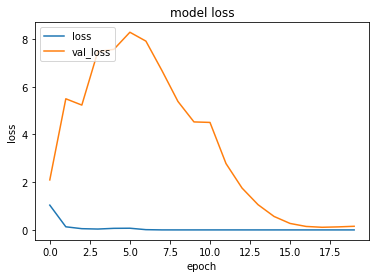

In [407]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

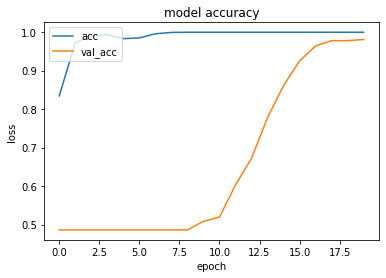

In [408]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'] )
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()